<h4>Les données utilisés dans ce tp proviennent d'un dataset disponible dans Kaggle appelé : COVID-19 Radiography Database<h4>

<h4>Le dataset est collecté par l'université de Qatar, l'université de Doha, l'université de Dhaka, en collaboration avec des chercheurs du Pakistan et Malaisie.</h4>

<h4>Le dataset contient 3616 X-Rays images de poumons positives au covid-19, 10200 images de poumons sains, ainsi que des images de poumons atteintes de pneumonia (qu'on vas pas utiliser ici).</h4>
    

<h4>Lien : https://www.kaggle.com/tawsifurrahman/covid19-radiography-database?select=COVID-19_Radiography_Dataset </h4>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import os

<h1> Data pre-processing </h1>

<h4>On définit les chemins des dossiers contenant les données: COVID et Normal</h4>

In [ ]:
path="COVID-19_Radiography_Dataset"
covid_dir = os.path.join(path, 'COVID')
normal_dir=os.path.join(path,"Normal")

<h4>On visualise 3 images de chaque classe</h4>

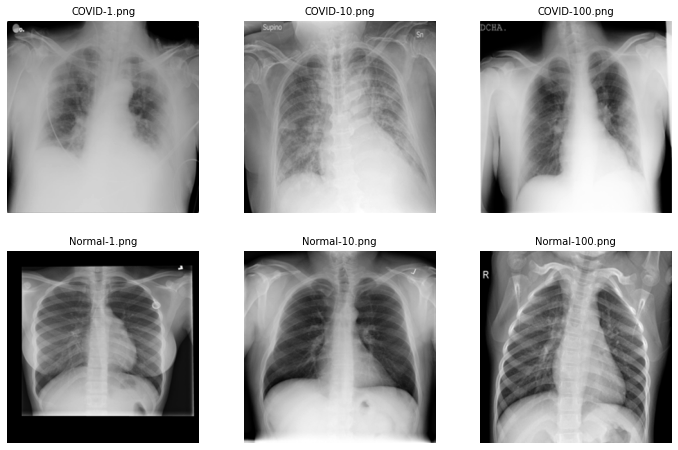

In [ ]:
import matplotlib.pyplot as mpimg


rows=3
cols =3

fig = plt.gcf()
fig.set_size_inches(12,12)


next_covid_pic = [os.path.join(covid_dir, fname) for fname in os.listdir(covid_dir)[0:3]]
next_normal_pic = [os.path.join(normal_dir, fname) for fname in os.listdir(normal_dir)[0:3]]


for i, img_path in enumerate(next_covid_pic + next_normal_pic):
    data = img_path.split('\\', 2)[2]
    sp = plt.subplot(rows, cols,i+1)
    sp.axis('Off')
    img = mpimg.imread(img_path)
    sp.set_title(data, fontsize=10)
    plt.imshow(img, cmap='gray')

plt.show()

<h4>On parcourt les dossiers de données et on charge leurs contenus dans la variable x, et la classe associée dans la variable y </h4>

In [ ]:
x = []
y = []
from skimage import io
from skimage.transform import resize
for i in range(1,800):
    covid = resize(io.imread(covid_dir+'/COVID-{}.png'.format(i)), (150,150))
    x.append(covid)
    y.append(1)

In [ ]:
for i in range(1,2000):
    normal= resize(io.imread(normal_dir+'/Normal-{}.png'.format(i)), (150,150))
    x.append(normal)
    y.append(0)

In [ ]:
x, y = np.asarray(x), np.asarray(y)

<h4>On divise les données en test et train</h4>

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2) 

In [ ]:
print('y_train shape:', y_train.shape)
print('y_test shape:',y_test.shape)

y_train shape: (1836,)
y_test shape: (459,)


<h4>On formate les images de tels façon qu'elles soient compatibles avec l'input de notre réseau; il faut ajouter une dimension au shapes pour annoncer au réseau que les images sont en niveau de gris.<br>
Ensuite on normaliser les images et transformes les classes target</h4>

In [ ]:
img_rows, img_cols = 150, 150

x_train=x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test=x_test.reshape(x_test.shape[0],img_rows,img_cols, 1)
input_shape=(img_rows,img_cols,1)

x_train=x_train/255.0
x_test=x_test/255.0
print('x_train shape:', x_train.shape)
print('x_test shape:',x_test.shape)

y_train=to_categorical(y_train, 2)
y_test=to_categorical(y_test, 2)
print('y_train shape:', y_train.shape)
print('y_test shape:',y_test.shape)


x_train shape: (1836, 150, 150, 1)
x_test shape: (459, 150, 150, 1)
y_train shape: (1836, 2)
y_test shape: (459, 2)


<h4>Pour la partie GridSearch, nos ordinateurs n'étaient en mesure de l'effectuer, et même l'utilisation de colab n'a pas reussi dû au timeout qui est de 12 heures maximale. On a donc utilisé l'ordinateur de notre camarade pour l'effectuer et déduire la meilleure configuration pour notre modèle. Cette configuration est presentée dans la cellule à suivre</h4>

In [ ]:
from tensorflow.keras.optimizers import Adam
def create_model(neurons=250,optimizer=Adam(learning_rate = 0.001),activation='relu'):
  model = Sequential()

# add the convolutional layer
#filters, size of filters, padding, activation_function, input_shape
model.add(Conv2D(32,(5,5), padding='SAME', activation=activation, input_shape=input_shape))

#pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#place a dropout layer
model.add(Dropout(0.5))

# add another convulutional layer
model.add(Conv2D(64,(5,5), padding='SAME', activation=activation))

#pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#place a dropout layer
model.add(Dropout(0.5))

# Flatten the image to 1 dimensional array
model.add(Flatten())

#add a dense layer : amount of nodes, activation
model.add(Dense(neurons, activation=activation'))

#place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))


	# Compile model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

  #model.summary()
 model.summary()
	return model


# create model
model = KerasClassifier(build_fn=create_model1, verbose=1)
# define the grid search parameters
neurons = [150, 200, 250]
batch_size = [8,10, 20, 40, 60, 80, 100]
epochs = [20, 30,  50, 100]
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
# activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(neurons=neurons,batch_size=batch_size,epochs=epochs,optimizer=optimizer, activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit_generator(X_train, Y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

<h4>On conceptualise notre modèle, le compile et l'entraine.<br>
Convolutional layer -> MaxPooling -> Dropout Layer -> Convolutional layer -> MaxPooling -> Dropout Layer -> Flatten layer -> Dense layer -> Dropout layer -> Output layer</h4>

In [ ]:
model = Sequential()

# add the convolutional layer
#filters, size of filters, padding, activation_function, input_shape
model.add(Conv2D(32,(5,5), padding='SAME', activation='relu', input_shape=input_shape))

#pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#place a dropout layer
model.add(Dropout(0.5))

# add another convulutional layer
model.add(Conv2D(64,(5,5), padding='SAME', activation='relu'))

#pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#place a dropout layer
model.add(Dropout(0.5))

# Flatten the image to 1 dimensional array
model.add(Flatten())

#add a dense layer : amount of nodes, activation
model.add(Dense(250, activation='relu'))

#place a dropout layer
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))
#model.summary()

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(Adam(learning_rate = 0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train,
          epochs= 30,
          validation_data = (x_test, y_test),
          validation_steps = 10)

Epoch 1/30
58/58 [==============================] - 112s 2s/step - loss: 0.6364 - accuracy: 0.6944 - val_loss: 0.6605 - val_accuracy: 0.6471
Epoch 2/30
58/58 [==============================] - 98s 2s/step - loss: 0.6150 - accuracy: 0.7059 - val_loss: 0.4452 - val_accuracy: 0.7429
Epoch 3/30
58/58 [==============================] - 110s 2s/step - loss: 0.3833 - accuracy: 0.8012 - val_loss: 0.2879 - val_accuracy: 0.8780
Epoch 4/30
58/58 [==============================] - 99s 2s/step - loss: 0.3083 - accuracy: 0.8434 - val_loss: 0.2610 - val_accuracy: 0.8911
Epoch 5/30
58/58 [==============================] - 99s 2s/step - loss: 0.2873 - accuracy: 0.8496 - val_loss: 0.2589 - val_accuracy: 0.8911
Epoch 6/30
58/58 [==============================] - 99s 2s/step - loss: 0.2615 - accuracy: 0.8772 - val_loss: 0.2630 - val_accuracy: 0.8867
Epoch 7/30
58/58 [==============================] - 103s 2s/step - loss: 0.2649 - accuracy: 0.8799 - val_loss: 0.2337 - val_accuracy: 0.9041
Epoch 8/30
58/58 

<h4>On récupère l'historique du modèle (on a oublié de le sauvegarder dans une variable et donc on y accède via son adresse)</h4>

In [ ]:
import ctypes
history = ctypes.cast(0x237ee8643d0, ctypes.py_object).value

<h4>Visualisation de l'évolution du loss au cours des epochs</h4>

Text(0.5, 0, 'epoch')

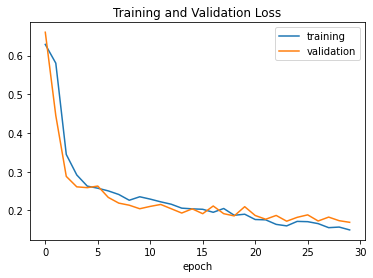

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')

<h4>Visualisation de l'évolution de l'accuracy au cours des epochs</h4>

Text(0.5, 0, 'epoch')

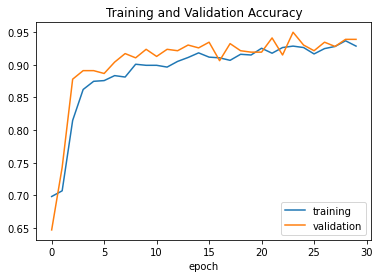

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoch')

<h2>Conclusion</h2>

<h4>Malgré l'incapabilité à réaliser des GridSearchs pour trouver la bonne configuration, et la fait que le modèle n'a pas reussi à surpasser une accuracy de 95%, nous jugeons que le processus a abouti à de bons résultats. Le fait que le modèle aie passer d'une accuracy de 64% à une accuracy de 0.94% fait preuve d'un bon apprentissage.<br>
    Ce TP nous a introduit à la puissance du deep learning, qui résulte en des modèles de prédictions et classification performants à partir d'images brutes, sans avoir à en extraire les caractéristiques.</h4>